In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt

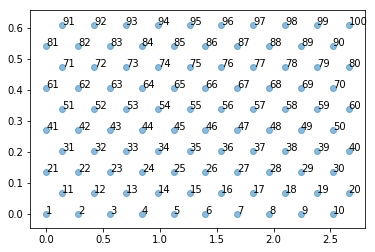

In [178]:
# Sam's way to make hex lattice:

# N must be even and this will make a lattice with N points in x and N points in y directions

N = 10
d = 0.28

# set up square mesh

nx, ny = (N, N)
x = np.linspace(0, N-1, nx)*d
y = np.linspace(0, N-1, ny)*d
xv, yv = np.meshgrid(x, y)
xv_array = np.asarray(xv).reshape(-1)
yv_array = np.asarray(yv).reshape(-1)

# scaling for hexagonal points (in y)
y_scale = np.sqrt(3)/2*d
yv_hex = yv_array*y_scale


# shift for hexagonal points (in x) - for every second row, bump a bit to the right
no_shift = np.zeros((N))
yes_shift = np.ones((N))*d/2
# vector that contains shifts for x coordinate every second row in lattice
x_shift = np.concatenate((no_shift, yes_shift), axis=0)

xv_hex = xv_array + np.tile(x_shift, N//2)

coordinates_hex = np.vstack((xv_hex, yv_hex))

plt.scatter(coordinates_hex[0,:],coordinates_hex[1,:], alpha = 0.5)

for i in range(N**2):
    plt.text(coordinates_hex[0,i],coordinates_hex[1,i], str(i+1))

plt.show()

In [88]:
# assign random energy states to sites
E = np.random.uniform(-1, 1, (N**2))
# indexing energy to fit hexagonal coordinates
E_coords = np.column_stack((xv_hex, yv_hex))

In [89]:
# Temperature
T = 298
# Boltzmann constant
kB = 8.617332e-5
kT = kB * T

In [174]:
# generate random initial point
# in lattice, a = a+1
# a = np.random.randint(0,N**2)
a = 9
# track positions
pos = [a]
# external field (positive: direction to the right)
E_ext = 1
angle = 60/180*np.pi
for n in range(15):
    # dE from six neighbouring atoms (electric field applied)
    # pos starts from a-1 and subsequent points in clockwise direction
    if a >= N and a < N**2-N:
        dE_pos1 = E[a-1]-E[a]+E_ext
        dE_pos2 = E[a+N]-E[a]+E_ext*np.cos(angle)
        dE_pos3 = E[a+N+1]-E[a]-E_ext*np.cos(angle)
        dE_pos4 = E[a+1]-E[a]-E_ext
        dE_pos5 = E[a-N+1]-E[a]-E_ext*np.cos(angle)
        dE_pos6 = E[a-N]-E[a]+E_ext*np.cos(angle)
    elif a < N:
        dE_pos5 = E[N**2-(N-a)]-E[a]-E_ext*np.cos(angle)
        dE_pos6 = E[N**2-(N-a)-1]-E[a]+E_ext*np.cos(angle)
    
    elif N**2-N <= a < N**2:
        dE_pos2 = E[N-(N**2-a)]-E[a]+E_ext*np.cos(angle)
        dE_pos3 = E[N-(N**2-a)-1]-E[a]-E_ext*np.cos(angle) 
        
    dE = np.array([dE_pos1, dE_pos2, dE_pos3, dE_pos4, dE_pos5, dE_pos6])
    
    # rate of hopping, v = 1*exp(-dE/kT)
    v =  np.exp(-dE/kT)
    
    # generate random number
    Randnum = random.uniform(0,1)
    # set position of pointer
    rk = Randnum * np.sum(v)
    # cumulative sum of energy
    k = np.cumsum(v)
    
    # going through k1, k1+k2...., ktotal
    check = []
    for i in np.nditer(k):
        # if value smaller than pointer, append to check
        if i < rk:
            check.append(i)  
    if len(check) == 0:
        a = a-1
    elif len(check) == 1:
        if N**2-N < a < N**2:
            a = N-(N**2-a)
        else:
            a = a+N-1                
    elif len(check) == 2:
        if N**2-N < a < N**2:
            a = N-(N**2-a)-1
        else:
            a = a+N       
    elif len(check) == 3:
        a = a+1
    elif len(check) == 4:
        if a < N:
            a = N**2-(N-a)
        else:
            a = a-N      
    else:
        if a < N:
            a = N**2-(N-a)-1
        else:
            a = a-N-1
        
            

    pos.append(a)
print(pos)

print(dE)
print(v)
print(check)


    


    
    

[9, 10, 0, 90, 80, 70, 71, 61, 62, 52, 53, 54, 55, 56, 57, 58]
[ 0.79761436  0.67119013  0.00947505 -0.99487525  0.40557443  0.67390136]
[3.24144132e-14 4.45477667e-12 6.91445439e-01 6.68867457e+16
 1.38331533e-07 4.00842292e-12]
[array(3.24144132e-14), array(4.48719109e-12), array(0.69144544)]


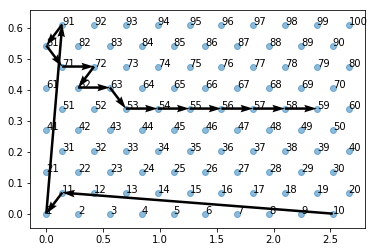

In [175]:
plt.scatter(coordinates_hex[0,:],coordinates_hex[1,:], alpha = 0.5)

for i in range(N**2):
    plt.text(coordinates_hex[0,i],coordinates_hex[1,i], str(i+1))

plt.quiver(xv_hex[pos[:-1]], yv_hex[pos[:-1]], xv_hex[pos[1:]]-xv_hex[pos[:-1]], yv_hex[pos[1:]]-yv_hex[pos[:-1]], scale_units='xy', angles='xy',scale=1)

plt.show()